# EDA ON STACK OVERFLOW 2019 DATA

Importing required libraries and modules

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

**Loading 2019 stack overflow data**

In [98]:
df= pd.read_csv("/Users/yodhasudarsi/Stackoverflow-Analysis/Data/survey_results_sample_2019.csv")

In [99]:
# Printing first 5 rows
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [100]:
# Dimension
df.shape

(99, 85)

In [101]:
# Features
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [102]:
# Datatypes
df.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

### Data Cleaning

In [103]:
missing_values=df.isnull().sum()
missing_values

Respondent       0
MainBranch       0
Hobbyist         0
OpenSourcer      0
OpenSource       2
                ..
Sexuality       16
Ethnicity       23
Dependents       7
SurveyLength     3
SurveyEase       2
Length: 85, dtype: int64

Therefore missing/null value exists

In [104]:
total_cells=np.product(df.shape)
total_missing=missing_values.sum()
percent=(total_missing/total_cells)*100
print('Total number of cells: ', total_cells)
print('Total number of missing values: ', total_missing)
print('Missing Percentage: ', percent, '%')

Total number of cells:  8415
Total number of missing values:  1151
Missing Percentage:  13.677956030897207 %


Nearly 14% missing values exist in the dataset

## Problem Statement: Investigate participation rates based on ethnicity and differences in income between men and women.

Selecting only required features for the EDA : ethnicity, income and gender

### Data Preparation

**Ethnicity**

In [105]:
df['Ethnicity'].isnull().sum()
missing_percentage_ethnicity = (df['Ethnicity'].isnull().sum() / len(df['Ethnicity'])) * 100

print("Missing percentage of the 'Ethnicity' column:", missing_percentage_ethnicity, "%")

Missing percentage of the 'Ethnicity' column: 23.232323232323232 %


In [106]:
df.groupby('Ethnicity')['Ethnicity'].count()

Ethnicity
Biracial                                                                                                                                                                                                      1
Black or of African descent                                                                                                                                                                                   3
Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent;Biracial;Multiracial     1
East Asian                                                                                                                                                                                                    5
East Asian;South Asian                                                                                                                                        

In [107]:
df.loc[df['Ethnicity'].str.match('Biracial') == True, 'Ethnicity'] = 'Biracial'
df.loc[df['Ethnicity'].str.match('Black or of African descent') == True, 'Ethnicity'] = 'Black or African descent'
df.loc[df['Ethnicity'].str.match('East Asian') == True, 'Ethnicity'] = 'East Asian'
df.loc[df['Ethnicity'].str.match('Hispanic or Latino') == True, 'Ethnicity'] = 'Hispanic or Latino'
df.loc[df['Ethnicity'].str.match('Indigenous') == True, 'Ethnicity'] = 'Indigenous'
df.loc[df['Ethnicity'].str.match('Middle Eastern') == True, 'Ethnicity'] = 'Middle Eastern'
df.loc[df['Ethnicity'].str.match('South') == True, 'Ethnicity'] = 'South Asian'
df.loc[df['Ethnicity'].str.match('White or of European descent') == True, 'Ethnicity'] = 'White or European descent'
df.loc[df['Ethnicity'].str.match('Multiracial') == True, 'Ethnicity'] = 'Multiracial'
df.loc[df['Ethnicity'].str.match('Native American') == True, 'Ethnicity'] = 'Native American'

In [108]:
df.groupby('Ethnicity')['Ethnicity'].count()

Ethnicity
Biracial                      1
Black or African descent      4
East Asian                    6
Hispanic or Latino            6
Middle Eastern                3
Multiracial                   1
South Asian                   8
White or European descent    47
Name: Ethnicity, dtype: int64

In [109]:
df['Ethnicity'].isnull().sum()

23

In [110]:
df['Ethnicity']=df.groupby(['Country'])['Ethnicity'].bfill().ffill()

In [111]:
df['Ethnicity'].isnull().sum()

0

**Gender**

In [112]:
df['Gender'].isnull().sum()
missing_percentage_gender = (df['Gender'].isnull().sum() / len(df['Gender'])) * 100

print("Missing percentage of the 'Gender' column:", missing_percentage_gender, "%")


Missing percentage of the 'Gender' column: 4.040404040404041 %


In [113]:
df.groupby('Gender')['Gender'].count()

Gender
Man                                                  87
Non-binary, genderqueer, or gender non-conforming     1
Woman                                                 7
Name: Gender, dtype: int64

In [114]:
df['Gender'] = df['Gender'].fillna('Non-binary, genderqueer, or gender non-conforming')
df['Gender'].replace('Female;Male;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Male;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Transgender;Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) ##not sure
df['Gender'].replace('Female;Male', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender', 'Female', inplace =True)
df['Gender'].replace('Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) #
df['Gender'].replace('Transgender', 'Male', inplace =True)

In [115]:
df.isnull().sum()['Gender']

0

**Income**

**Took Compensation as income in this dataset**

In [122]:
df['CompTotal'].isnull().sum()
missing_percentage_CompTotal = (df['CompTotal'].isnull().sum() / len(df['CompTotal'])) * 100

print("Missing percentage of the 'CompTotal' column:", missing_percentage_CompTotal, "%")

Missing percentage of the 'CompTotal' column: 2.0202020202020203 %


In [123]:
df['CompTotal'].fillna(method='ffill', inplace=True)

In [125]:
df.dropna(subset=['CompTotal'], inplace = True)

In [126]:
df['CompTotal'].isnull().sum()

0

In [201]:
df.groupby('Gender')['CompTotal'].count()

Gender
Man               85
Non-conforming     5
Woman              7
Name: CompTotal, dtype: int64

# Participation rate based on ethnicity

### Data Visualization

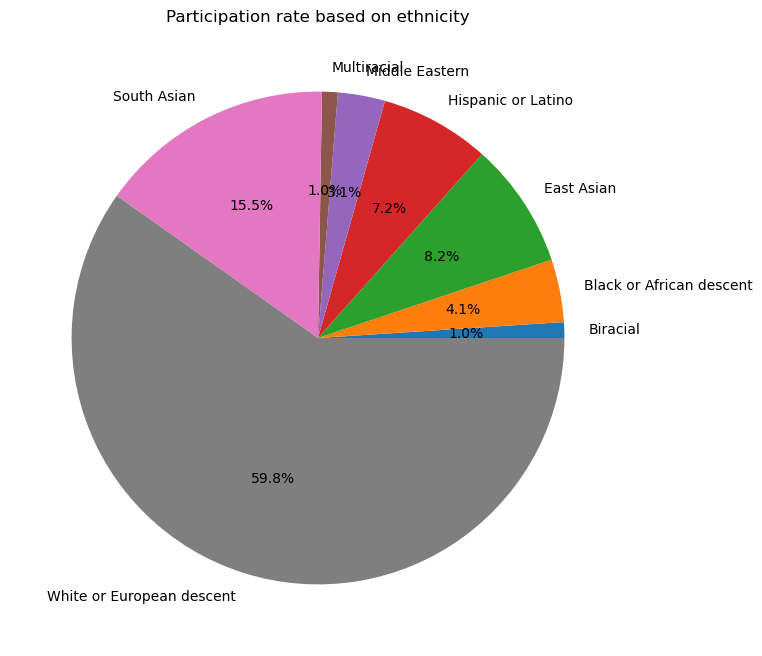

In [191]:
lst=df.groupby('Ethnicity')['Ethnicity'].count()
plt.figure(figsize=(8,8))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Participation rate based on ethnicity')  # Add a title
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In [181]:
import plotly.express as px

In [169]:
participation_rate = df['Ethnicity'].value_counts().keys().tolist()
print(participation_rate)
count = df['Ethnicity'].value_counts().tolist()
print(count)

['White or European descent', 'South Asian', 'East Asian', 'Hispanic or Latino', 'Black or African descent', 'Middle Eastern', 'Multiracial', 'Biracial']
[58, 15, 8, 7, 4, 3, 1, 1]


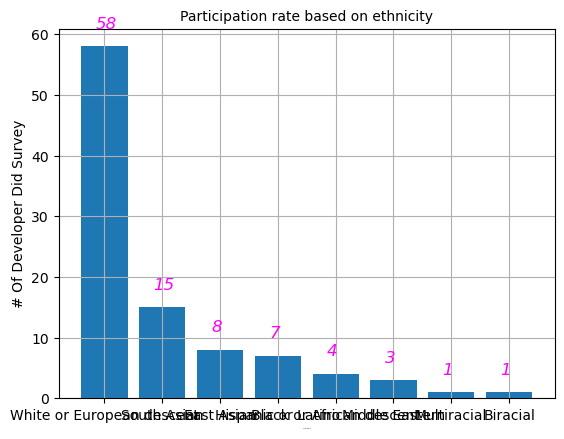

In [180]:
fig, ax = plt.subplots()    
 
ax.bar(participation_rate,count)
plt.title('Participation rate based on ethnicity',size=10)
plt.xlabel('Total Count',size = 1)
plt.ylabel('# Of Developer Did Survey',size = 10) 
for i, v in enumerate(count):
    ax.text(i-.15, 
              v+3,
              count[i],
              style = 'italic',
              fontsize=12,
              color = 'magenta')
ax.grid(True)

**The visualization shows that people of White or European descent participate more than those from other ethnic backgrounds.**

# Differences in income between men and women

Text(0.5, 1.0, 'Income vs Gender')

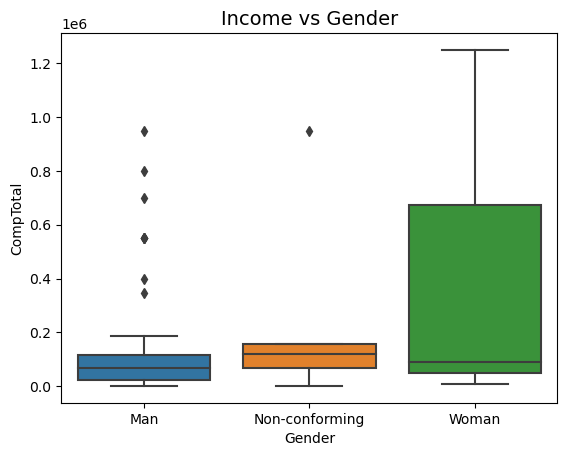

In [209]:
sns.boxplot(x ='Gender', y='', data=df)
plt.title('Income vs Gender', fontsize = 14)

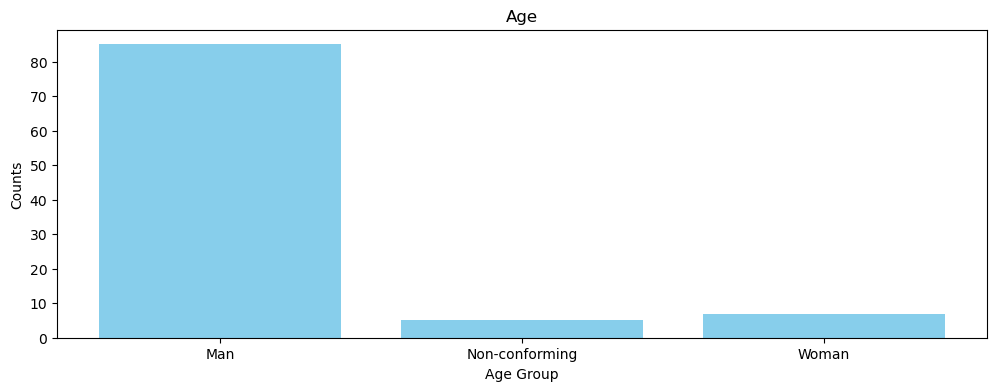

In [215]:
lst=df.groupby('Gender')['Ethnicity'].count()
plt.figure(figsize=(12,4))
plt.bar(list(lst.keys()), lst.values, color='skyblue')  # Plotting the bars

# Adding labels and title
plt.xlabel('Age Group')  # Label for x-axis
plt.ylabel('Counts')      # Label for y-axis
plt.title('Age')  # Title of the plot
#plt.xticks(rotation=45)  # Rotate labels by 90 degrees

# Display the plot
plt.show()

**Based on the data analysis above, it's evident that men generally earn more than women.**

# Conclusion

Overall, we performed EDA on the Stack overflow 2019 developer survey and derived insights from it. We found the participation rates based on ethnicity and differences in income between men and women.